In [ ]:
In this part of the final project, you will generate a data set that has certain statistical
properties. “Synthetic” or “Fake” data can be useful for developing and testing algorithms
and models.

Your solution to this part will consist of:
• a jupyter notebook or qmd file called fake_data_builder.ipynb or fake_data_builder.qmd
that:
    
a. carries out the construction of the desired dataset
b. answers the questions and provides the plots requested below
• a copy of the fake_data.csv file that you construct.

I should be able to work through your ipynb or qmd file and build the desired dataset.
This jupyter notebook and associated fake_data.csv file should be included in your Git
repository.

Your dataset has the following properties:
• There are 800 samples.
• Each sample from the dataset has five features called ID, Group, Feature_1, Feature_2
and Feature_3.
• The ID feature is a unique identifier for each sample. The identifier has the form IDxxx
where x is a three digit number.
• The Group feature is either A, B, or C. Roughly a third of each sample lies in each group.
• Feature_1 is sampled randomly from a normal distribution with mean 2500. About 66%
of the data falls between 2200 and 2800.
• Feature_2 is sampled randomly from a normal distribution with mean 400 and standard
deviation 15.
• Feature_3 depends on the Group feature. For A, Feature_3 is approximately
3(Feature_1)-5(Feature_2). For B, Feature_3 is approximately 2(Feature_1). For
C, Feature_3 is approximately -(Feature_1)+(Feature_2). In each of cases A, B, and
C the difference between Feature_3 and the value given by the formula is a normally
distributed random variable with mean 0 and standard deviation 12.

In [6]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate unique IDs
def generate_id():
    return 'ID' + str(np.random.randint(100, 1000))

# Generate 800 unique IDs
ids = [generate_id() for _ in range(800)]

# Generate Group feature (roughly a third in each group)
groups = np.random.choice(['A', 'B', 'C'], size=800, p=[1/3, 1/3, 1/3])

# Generate Feature_1 from a normal distribution
feature_1 = np.random.normal(loc=2500, scale=100, size=800)
feature_1 = np.clip(feature_1, 2200, 2800)  # Clip values outside 2200-2800 range

# Generate Feature_2 from a normal distribution
feature_2 = np.random.normal(loc=400, scale=15, size=800)

# Generate Feature_3 based on Group feature
feature_3 = np.zeros(800)
for i in range(800):
    if groups[i] == 'A':
        feature_3[i] = 3 * feature_1[i] - 5 * feature_2[i]
    elif groups[i] == 'B':
        feature_3[i] = 2 * feature_1[i]
    else:
        feature_3[i] = -feature_1[i] + feature_2[i]
    # Add noise with mean 0 and standard deviation 12 to Feature_3
    feature_3[i] += np.random.normal(loc=0, scale=12)

# Create a DataFrame
data = {
    'ID': ids,
    'Group': groups,
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3
}

df = pd.DataFrame(data)

# 1. Create a dataframe representing the dataset
print(df.head())

      ID Group    Feature_1   Feature_2    Feature_3
0  ID202     A  2357.387447  421.023486  4975.008782
1  ID535     B  2560.616509  416.635811  5126.797017
2  ID960     A  2351.322922  394.558931  5085.502259
3  ID370     B  2531.642607  392.461008  5063.694798
4  ID206     B  2544.465519  386.560018  5098.369517


In [7]:
# 2. Answer the questions
# a. Expected number of samples where Feature_1 > 3000 based on the theoretical distribution
# Answer: The expected number of samples where Feature_1 > 3000 would be atleast 17% or less of the dataset. This is because we given that 66% of our dataset already falls between 2200 and 2800 with a normal distribution of mean of 2500.

# b. Actual number of samples where Feature_1 > 3000
actual_samples_gt_3000 = sum(df['Feature_1'] > 3000)
print(f"b. Actual samples where Feature_1 > 3000: {actual_samples_gt_3000}")

# c. Grouping dataset by Group field and computing mean and standard deviation of Feature_3 within each group
grouped = df.groupby('Group')['Feature_3'].agg(['mean', 'std'])
print("c. Grouped dataset - Mean and Standard Deviation of Feature_3 within each group:")
print(grouped)

b. Actual samples where Feature_1 > 3000: 0
c. Grouped dataset - Mean and Standard Deviation of Feature_3 within each group:
              mean         std
Group                         
A      5510.382819  311.171133
B      5017.645766  205.316622
C     -2090.189142  106.353368


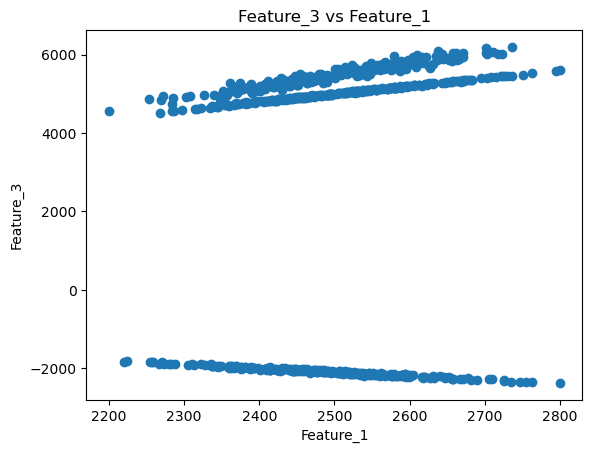

In [8]:
# 3. Make a scatterplot of Feature_3 vs Feature_1
import matplotlib.pyplot as plt

plt.scatter(df['Feature_1'], df['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Feature_3 vs Feature_1')
plt.show()

In [9]:
# 4. Write datafreame to a CSV file
df.to_csv('fake_data.csv', index=False)